#### Loading Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

#### Load dataset files

In [2]:
df_cab = pd.read_csv('/Users/siddharthhaveliwala/dataglacierrepos/week-2/dataset/DataSets/Cab_Data.csv')
df_city = pd.read_csv('/Users/siddharthhaveliwala/dataglacierrepos/week-2/dataset/DataSets/City.csv')
df_customer = pd.read_csv('/Users/siddharthhaveliwala/dataglacierrepos/week-2/dataset/DataSets/Customer_ID.csv')
df_transaction = pd.read_csv('/Users/siddharthhaveliwala/dataglacierrepos/week-2/dataset/DataSets/Transaction_ID.csv')

#### Dataset shapes and columns

In [3]:
df_cab.columns, df_cab.shape

(Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
        'Price Charged', 'Cost of Trip'],
       dtype='object'),
 (359392, 7))

In [4]:
df_city.columns, df_city.shape

(Index(['City', 'Population', 'Users'], dtype='object'), (20, 3))

In [5]:
df_customer.columns, df_customer.shape

(Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object'),
 (49171, 4))

In [6]:
df_transaction.columns, df_transaction.shape

(Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object'),
 (440098, 3))

In [7]:
sales = pd.merge(df_cab, df_transaction, on='Transaction ID')

In [8]:
sales.columns, sales.shape

(Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
        'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode'],
       dtype='object'),
 (359392, 9))

#### Statistics Summary

In [9]:
sales.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [10]:
sales = sales.loc[:, ['Transaction ID', 'Customer ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
              'Price Charged', 'Cost of Trip', 'Payment_Mode']]

In [11]:
sales.head(5), sales.shape

(   Transaction ID  Customer ID Date of Travel   Company        City  \
 0        10000011        29290     2016-01-08  Pink Cab  ATLANTA GA   
 1        10000012        27703     2016-01-06  Pink Cab  ATLANTA GA   
 2        10000013        28712     2016-01-02  Pink Cab  ATLANTA GA   
 3        10000014        28020     2016-01-07  Pink Cab  ATLANTA GA   
 4        10000015        27182     2016-01-03  Pink Cab  ATLANTA GA   
 
    KM Travelled  Price Charged  Cost of Trip Payment_Mode  
 0         30.45         370.95       313.635         Card  
 1         28.62         358.52       334.854         Card  
 2          9.04         125.20        97.632         Cash  
 3         33.17         377.40       351.602         Cash  
 4          8.73         114.62        97.776         Card  ,
 (359392, 9))

In [12]:
sales.tail()

,Transaction ID,Customer ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode
359387,10440101,52392,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash
359388,10440104,53286,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash
359389,10440105,52265,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash
359390,10440106,52175,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card
359391,10440107,52917,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,Card


In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Customer ID     359392 non-null  int64  
 2   Date of Travel  359392 non-null  object 
 3   Company         359392 non-null  object 
 4   City            359392 non-null  object 
 5   KM Travelled    359392 non-null  float64
 6   Price Charged   359392 non-null  float64
 7   Cost of Trip    359392 non-null  float64
 8   Payment_Mode    359392 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 24.7+ MB


In [14]:
sales.nunique()

Transaction ID    359392
Customer ID        46148
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
Payment_Mode           2
dtype: int64

In [15]:
sales.isnull().sum()

Transaction ID    0
Customer ID       0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Payment_Mode      0
dtype: int64

In [16]:
sales.columns = ['TRANSACTION_ID', 'CUSTOMER_ID', 'DATE_OF_TRAVEL', 'COMPANY', 'CITY',
                 'KM_TRAVEL', 'PRICE_CHARGED', 'COST_OF_TRIP', 'PAYMENT_MODE']

In [17]:
sales['PROFIT'] = sales['PRICE_CHARGED'] - sales['COST_OF_TRIP']
sales['PROFIT%'] = (sales['PRICE_CHARGED'] - sales['COST_OF_TRIP']) / sales['COST_OF_TRIP']*100
sales['COST_PER_KM'] = sales['COST_OF_TRIP'] / sales['KM_TRAVEL']

In [18]:
sales.head(5)

,TRANSACTION_ID,CUSTOMER_ID,DATE_OF_TRAVEL,COMPANY,CITY,KM_TRAVEL,PRICE_CHARGED,COST_OF_TRIP,PAYMENT_MODE,PROFIT,PROFIT%,COST_PER_KM
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,57.315,18.274427,10.3
1,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,23.666,7.067558,11.7
2,10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Cash,27.568,28.236644,10.8
3,10000014,28020,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Cash,25.798,7.337273,10.6
4,10000015,27182,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Card,16.844,17.227131,11.2


In [19]:
df_customer.columns = ['CUSTOMER_ID', 'GENDER', 'AGE', 'INCOME']

In [20]:
customers = pd.merge(sales, df_customer, on = 'CUSTOMER_ID')

In [21]:
customers.head()

,TRANSACTION_ID,CUSTOMER_ID,DATE_OF_TRAVEL,COMPANY,CITY,KM_TRAVEL,PRICE_CHARGED,COST_OF_TRIP,PAYMENT_MODE,PROFIT,PROFIT%,COST_PER_KM,GENDER,AGE,INCOME
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,57.3150,18.274427,10.30,Male,28,10813
1,10351127,29290,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,281.2772,88.612790,12.12,Male,28,10813
2,10412921,29290,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,194.6480,32.582415,14.04,Male,28,10813
3,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,23.6660,7.067558,11.70,Male,27,9237
4,10320494,27703,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,253.9808,54.371732,12.84,Male,27,9237


In [22]:
customers = customers.drop(['PRICE_CHARGED', 'COST_OF_TRIP', 'PROFIT', 'PROFIT%', 'COST_PER_KM'], axis = 1)

In [23]:
customers.head()

,TRANSACTION_ID,CUSTOMER_ID,DATE_OF_TRAVEL,COMPANY,CITY,KM_TRAVEL,PAYMENT_MODE,GENDER,AGE,INCOME
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,Card,Male,28,10813
1,10351127,29290,2018-07-21,Yellow Cab,ATLANTA GA,26.19,Cash,Male,28,10813
2,10412921,29290,2018-11-23,Yellow Cab,ATLANTA GA,42.55,Card,Male,28,10813
3,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,Card,Male,27,9237
4,10320494,27703,2018-04-21,Yellow Cab,ATLANTA GA,36.38,Card,Male,27,9237


In [24]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TRANSACTION_ID  359392 non-null  int64  
 1   CUSTOMER_ID     359392 non-null  int64  
 2   DATE_OF_TRAVEL  359392 non-null  object 
 3   COMPANY         359392 non-null  object 
 4   CITY            359392 non-null  object 
 5   KM_TRAVEL       359392 non-null  float64
 6   PAYMENT_MODE    359392 non-null  object 
 7   GENDER          359392 non-null  object 
 8   AGE             359392 non-null  int64  
 9   INCOME          359392 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 27.4+ MB


In [25]:
customers.isnull().sum()

TRANSACTION_ID    0
CUSTOMER_ID       0
DATE_OF_TRAVEL    0
COMPANY           0
CITY              0
KM_TRAVEL         0
PAYMENT_MODE      0
GENDER            0
AGE               0
INCOME            0
dtype: int64

In [26]:
customers.nunique()

TRANSACTION_ID    359392
CUSTOMER_ID        46148
DATE_OF_TRAVEL      1095
COMPANY                2
CITY                  19
KM_TRAVEL            874
PAYMENT_MODE           2
GENDER                 2
AGE                   48
INCOME             22725
dtype: int64

In [27]:
customers.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TRANSACTION_ID,359392.0,NaN,NaN,NaN,10220761.185363,126805.803715,10000011.0,10110809.75,10221035.5,10330937.25,10440107.0
CUSTOMER_ID,359392.0,NaN,NaN,NaN,19191.652115,21012.412463,1.0,2705.0,7459.0,36078.0,60000.0
DATE_OF_TRAVEL,359392,1095,2018-01-05,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMPANY,359392,2,Yellow Cab,274681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CITY,359392,19,NEW YORK NY,99885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM_TRAVEL,359392.0,NaN,NaN,NaN,22.567254,12.233526,1.9,12.0,22.44,32.96,48.0
PAYMENT_MODE,359392,2,Card,215504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,359392,2,Male,205912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,359392.0,NaN,NaN,NaN,35.336705,12.594234,18.0,25.0,33.0,42.0,65.0
INCOME,359392.0,NaN,NaN,NaN,15048.822937,7969.409482,2000.0,8424.0,14685.0,21035.0,35000.0


In [28]:
sales.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TRANSACTION_ID,359392.0,NaN,NaN,NaN,10220761.185363,126805.803715,10000011.0,10110809.75,10221035.5,10330937.25,10440107.0
CUSTOMER_ID,359392.0,NaN,NaN,NaN,19191.652115,21012.412463,1.0,2705.0,7459.0,36078.0,60000.0
DATE_OF_TRAVEL,359392,1095,2018-01-05,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMPANY,359392,2,Yellow Cab,274681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CITY,359392,19,NEW YORK NY,99885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM_TRAVEL,359392.0,NaN,NaN,NaN,22.567254,12.233526,1.9,12.0,22.44,32.96,48.0
PRICE_CHARGED,359392.0,NaN,NaN,NaN,423.443311,274.378911,15.6,206.4375,386.36,583.66,2048.03
COST_OF_TRIP,359392.0,NaN,NaN,NaN,286.190113,157.993661,19.0,151.2,282.48,413.6832,691.2
PAYMENT_MODE,359392,2,Card,215504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROFIT,359392.0,NaN,NaN,NaN,137.253198,160.31184,-220.06,28.012,81.962,190.03,1463.966


#### FINAL DATAFRAMES: sales, customers

In [35]:
cat_cols_sales = sales.select_dtypes(include = ['object']).columns
num_cols_sales = sales.select_dtypes(include = np.number).columns.tolist()
print("Categorical Variables in Sales:")
print(cat_cols_sales)
print("Numerical Variables in Sales:")
print(num_cols_sales)

Categorical Variables in Sales:
Index(['DATE_OF_TRAVEL', 'COMPANY', 'CITY', 'PAYMENT_MODE'], dtype='object')
Numerical Variables in Sales:
['TRANSACTION_ID', 'CUSTOMER_ID', 'KM_TRAVEL', 'PRICE_CHARGED', 'COST_OF_TRIP', 'PROFIT', 'PROFIT%', 'COST_PER_KM']


In [36]:
cat_cols_customers = customers.select_dtypes(include = ['object']).columns
num_cols_customers = customers.select_dtypes(include = np.number).columns.tolist()
print("Categorical Variables in Customers:")
print(cat_cols_customers)
print("Numerical Variables in Customers:")
print(num_cols_customers)

Categorical Variables in Customers:
Index(['DATE_OF_TRAVEL', 'COMPANY', 'CITY', 'PAYMENT_MODE', 'GENDER'], dtype='object')
Numerical Variables in Customers:
['TRANSACTION_ID', 'CUSTOMER_ID', 'KM_TRAVEL', 'AGE', 'INCOME']


#### Sales-wise EDA Univariate Analysis

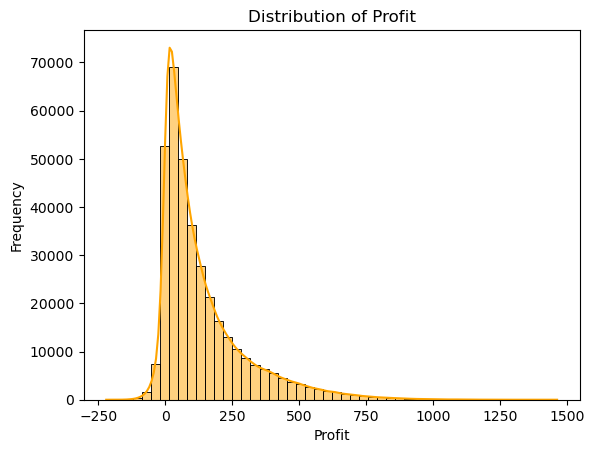

In [38]:
sns.histplot(sales.PROFIT, kde = True, bins = 50, color = 'orange', edgecolor = 'black')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')
plt.show()

<pre>From the above histogram plot we can notice that the mean profit in the cab business for the period 2016-2018 is around 150 which shows that cab business is good and worth investing into in this market.</pre>

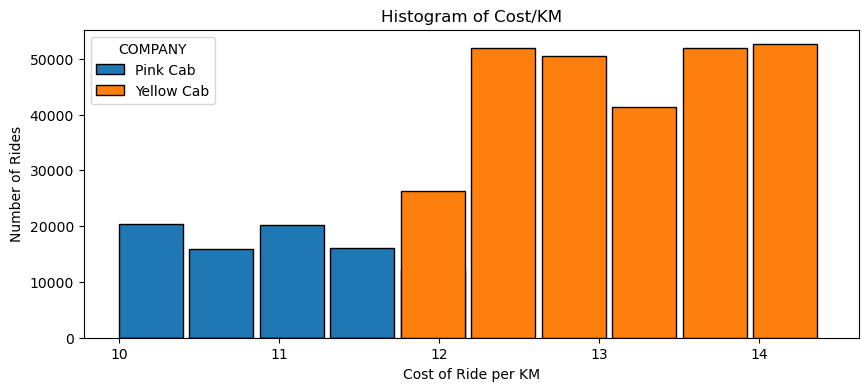

In [39]:
sales.pivot(columns='COMPANY', values='COST_PER_KM').plot.hist(edgecolor='black', width=0.4, figsize=(10, 4))
plt.xlabel('Cost of Ride per KM')
plt.ylabel('Number of Rides')
plt.title('Histogram of Cost/KM')
plt.show()

<pre>Above histogram of Cost per KM of ride shows that Yellow cabs have higher Cost/KM rate but not very high as comparted to the Pink cabs.</pre>

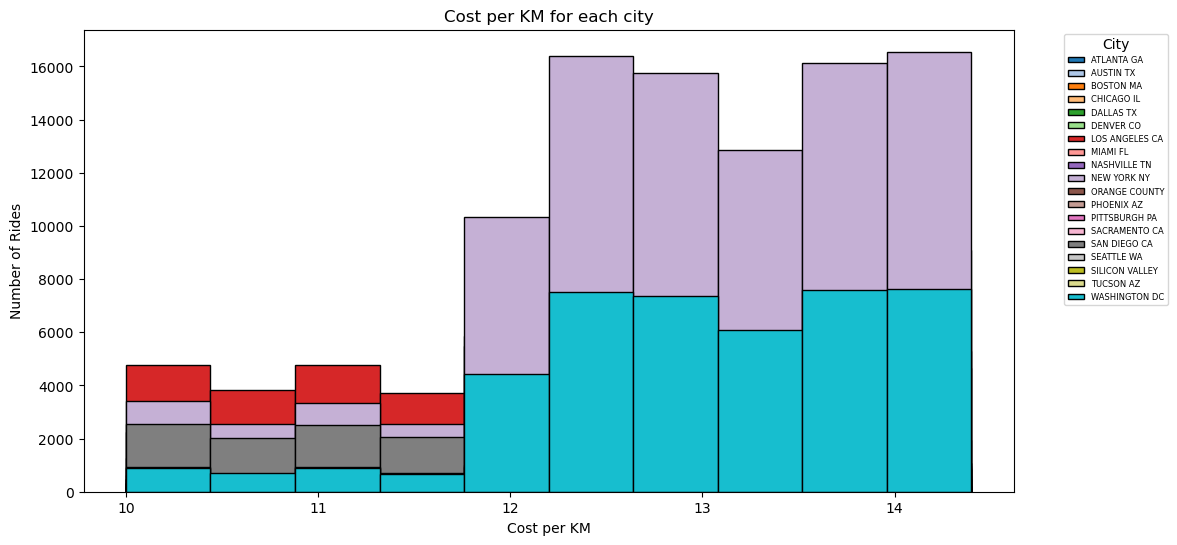

In [40]:
plt.rcParams['figure.figsize'] = [12, 6]
colormap = plt.cm.get_cmap('tab20', 20)
colors = [colormap(i) for i in range(20)]
sales.pivot(columns = 'CITY', values = 'COST_PER_KM').plot.hist(color = colors, edgecolor = 'black')

plt.xlabel('Cost per KM')
plt.ylabel('Number of Rides')
plt.title('Cost per KM for each city')
plt.legend(title = 'City', bbox_to_anchor=(1.05, 1), loc = 2, prop = {'size': 6})
plt.show()

<pre>The above bar char shows the Cost per KM in various cities. It justifies that Washington DC and New York NY has the highest Cost per KM rate and number of rides for both of the cab companies.</pre>

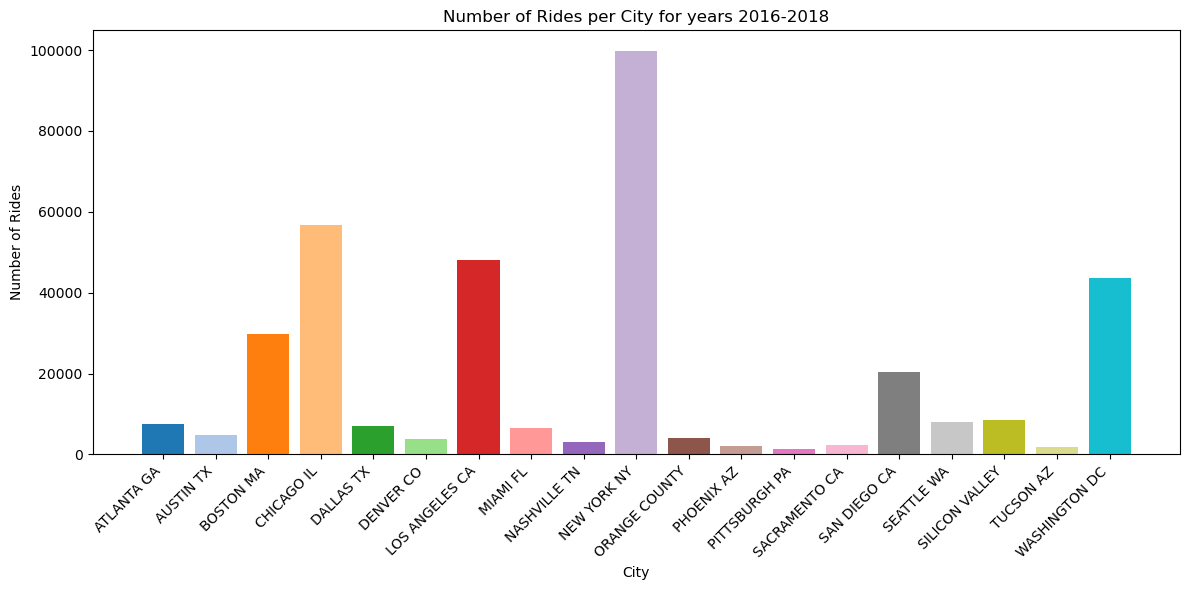

In [41]:
city_rides = sales.groupby('CITY')['TRANSACTION_ID'].count().reset_index()
city_rides.columns = ['CITY','RIDE_COUNT']

plt.rcParams['figure.figsize'] = [12, 6]
plt.bar(city_rides['CITY'], city_rides['RIDE_COUNT'], color = colors)

plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.title('Number of Rides per City for years 2016-2018')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

<pre>As we dwelve into city-wise analysis, we also identified that the number of rides were significantly higher in New York NY state and other cities Boston, Chicago, Los Angeles and Washington DC were among other cities where the number of rides were high and growing.</pre>

In [42]:
avg_cost_per_km = sales.groupby('COMPANY')['COST_PER_KM'].mean().reset_index()
print(f"Average Cost per KM for Pink Cab: {round(avg_cost_per_km.COST_PER_KM[0], 3)}")
print(f"Average Cost per KM for Yellow Cab: {round(avg_cost_per_km.COST_PER_KM[1], 3)}")

Average Cost per KM for Pink Cab: 10.999
Average Cost per KM for Yellow Cab: 13.201


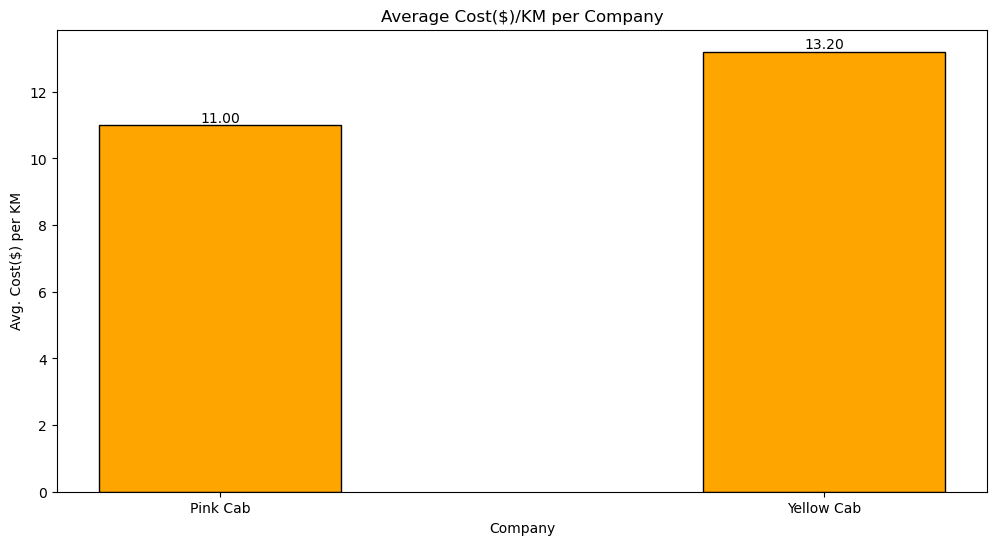

In [43]:
bars = plt.bar(avg_cost_per_km['COMPANY'], avg_cost_per_km['COST_PER_KM'], color='orange',
        edgecolor='black', width=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Company')
plt.ylabel('Avg. Cost($) per KM')
plt.title('Average Cost($)/KM per Company')
plt.show()

<pre>As mentioned earlier, the Yellow cabs have higher Cost/KM rate with mean $13.20 and Pink cabs have slightly lower rate with mean $11.00. </pre>

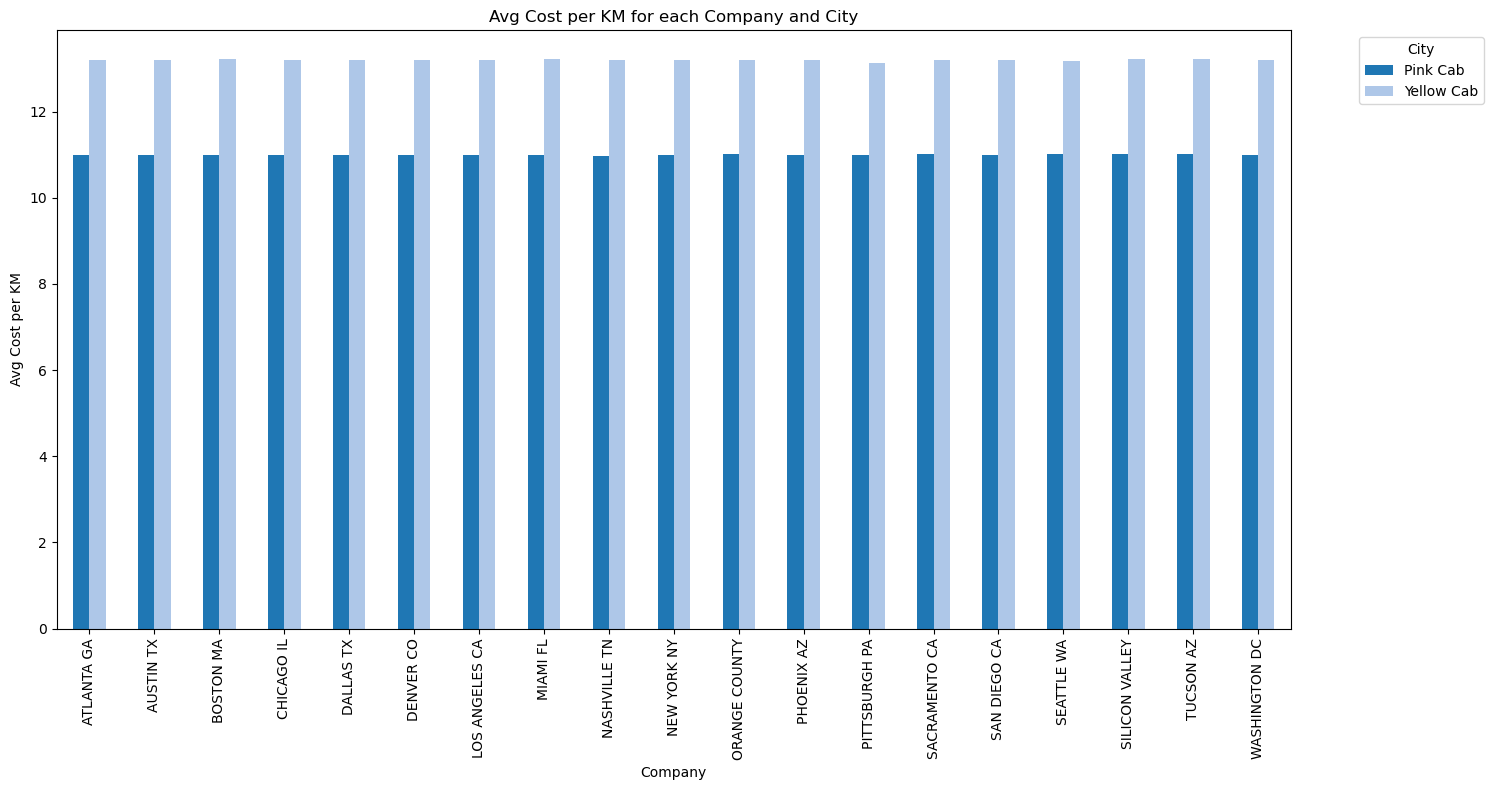

In [44]:
avg_cost_city = sales.groupby(['COMPANY', 'CITY'])['COST_PER_KM'].mean().reset_index()
avg_cost_city_pivot = avg_cost_city.pivot(index='CITY', columns='COMPANY', values='COST_PER_KM')

colormap = plt.cm.get_cmap('tab20', 20)
colors = [colormap(i) for i in range(20)]
avg_cost_city_pivot.plot(kind='bar', stacked=False, figsize=(15,8), color=colors)

plt.xlabel('Company')
plt.ylabel('Avg Cost per KM')
plt.title('Avg Cost per KM for each Company and City')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

<pre>From the above bar chart, we finalized that Yellow cabs indeed has higher average cost/KM rate for each city and Pink cabs have slightly lower cost/KM rate.</pre>

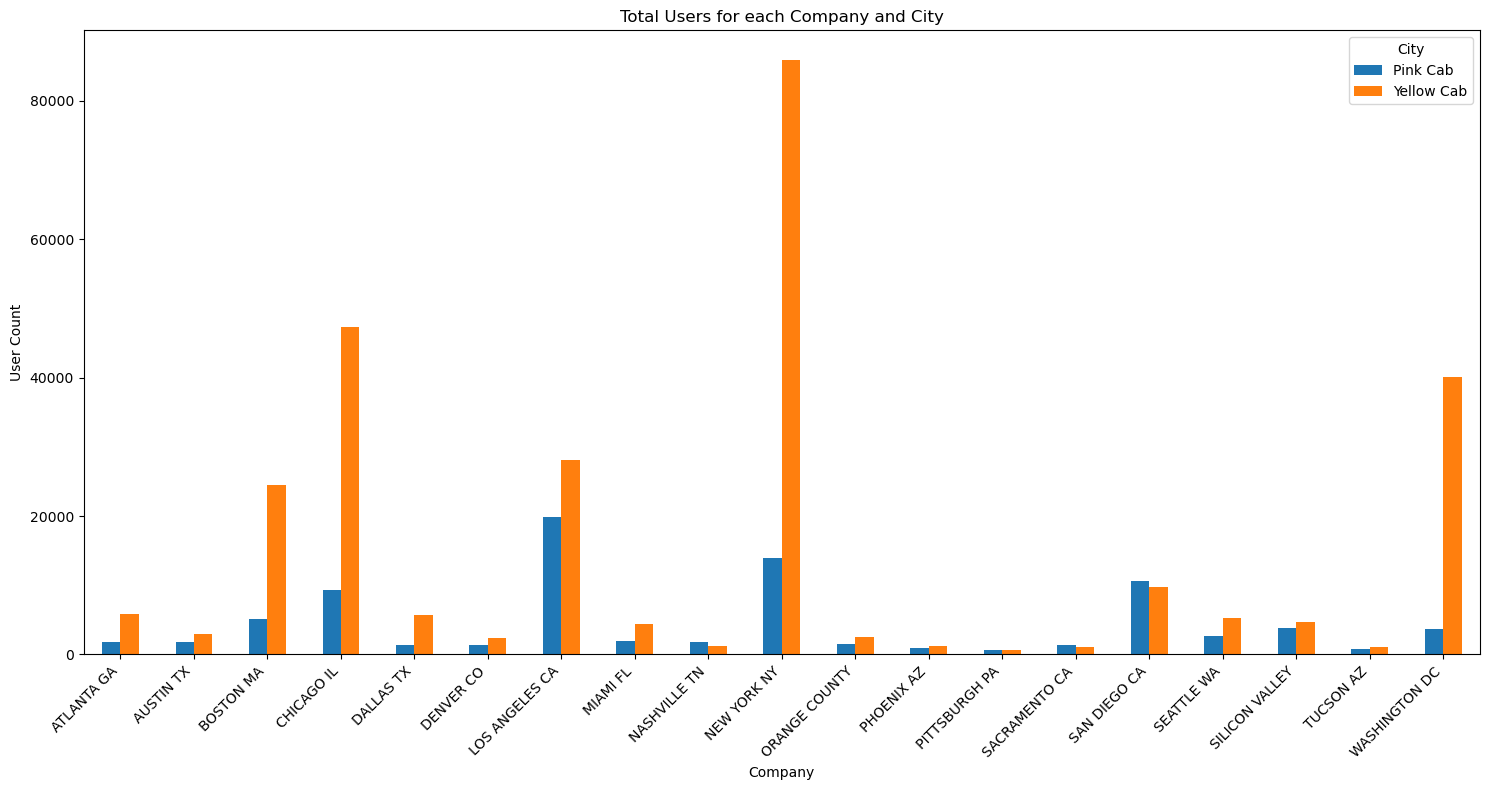

In [45]:
company_sales = sales.groupby(['COMPANY', 'CITY'])['CUSTOMER_ID'].count().reset_index()
company_sales = company_sales.pivot(index='CITY', columns='COMPANY', values='CUSTOMER_ID')

colormap = plt.cm.get_cmap('tab20', 20)
colors = [colormap(i) for i in range(20)]
company_sales.plot(kind='bar', stacked=False, figsize=(15,8))

plt.xlabel('Company')
plt.ylabel('User Count')
plt.title('Total Users for each Company and City')
plt.legend(title='City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<pre>As per the above bar chart, we can see that number of customers are significanyl higher in metropolitan cities like New York, Washington DC, Chicago and Los Angeles. It is also noticeable that Yellow cabs have captured the market well with more number of customers riding with them, however there are few exceptions such as cities Sacramento CA, San Diego CA and Nashville TN.</pre>

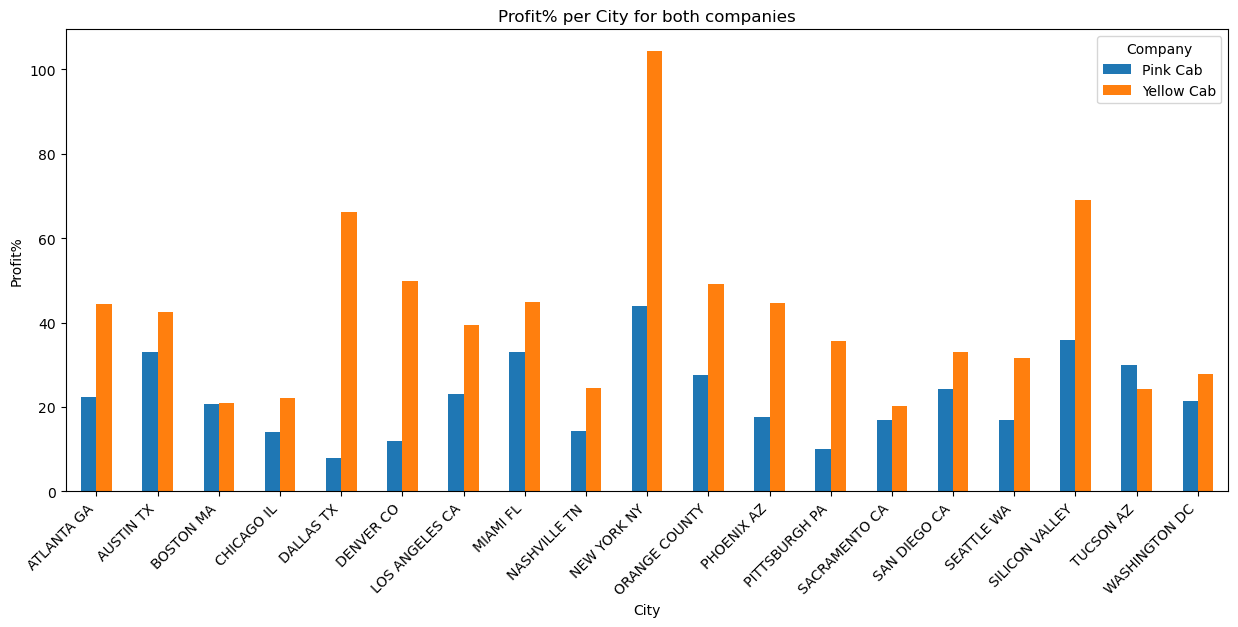

In [46]:
profit_share = sales.groupby(['COMPANY', 'CITY'])['PROFIT%'].mean().reset_index()
profit_share.pivot(index='CITY', columns='COMPANY', values='PROFIT%').plot(kind='bar', stacked=False, figsize=(15,6))

plt.xlabel('City')
plt.ylabel('Profit%')
plt.title('Profit% per City for both companies')
plt.legend(title='Company')
plt.xticks(rotation=45, ha='right')
plt.show()

<pre>Even though number of customers are very high in metropolitans, we can see that profit share is distributed among all cities with metropolitans giving best returns. Also, Yellow cabs are more profiting from cab rides as we can notice from the plot.</pre>

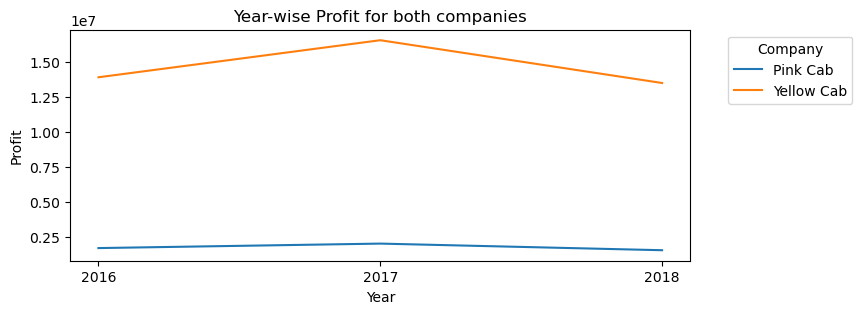

In [47]:
profit_by_year = sales.groupby(['COMPANY', pd.to_datetime(sales.DATE_OF_TRAVEL).dt.year])['PROFIT'].sum().reset_index()
profit_by_year.PROFIT = profit_by_year.PROFIT.astype(int)

profit_by_year.pivot(index='DATE_OF_TRAVEL', columns='COMPANY', values='PROFIT').plot(kind='line', stacked=False, figsize=(8,3))

plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Year-wise Profit for both companies')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks([2016, 2017, 2018])
plt.show()

<pre>As we dwelve deep into the profit share, from the above plot we can analyze that yea-r wise profit for Yellow cabs are significantly higher than Pink cabs. But there is a dip in the profit after 2017 for both the cab companies which might be due to market situations.</pre>

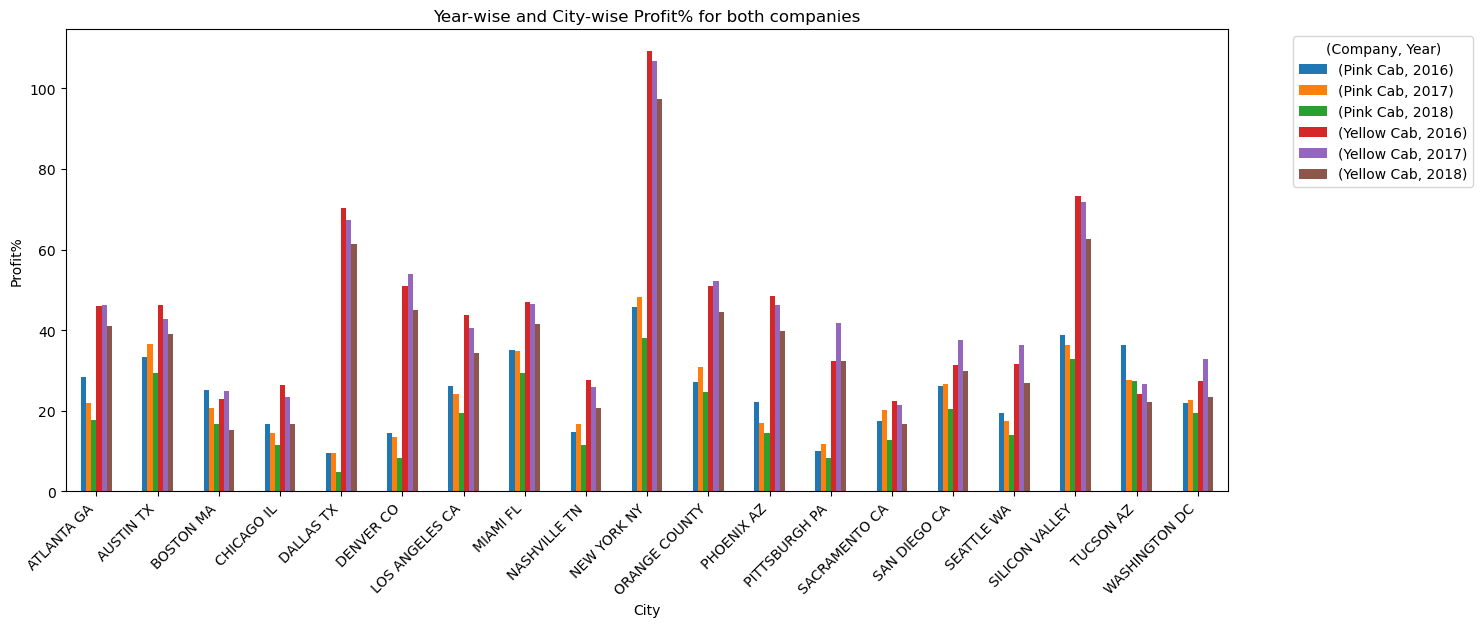

In [110]:
profit_by_city = sales.groupby(['COMPANY', 'CITY', pd.to_datetime(sales.DATE_OF_TRAVEL).dt.year])['PROFIT%'].mean().reset_index()
profit_by_city.pivot(index=['CITY'], columns=['COMPANY', 'DATE_OF_TRAVEL'], values='PROFIT%').plot(kind='bar', stacked=False, figsize=(15,6))

plt.xlabel('City')
plt.ylabel('Profit%')
plt.title('Year-wise and City-wise Profit% for both companies')
plt.legend(title='(Company, Year)', bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(rotation=45, ha='right')
plt.show()

<pre>The above plot shows the % profit gain for each year in each city for both the cab companies. We can notice that Yellow cabs profit is going down from 2017 to 2018 at higher rate than Pink cabs but still the market is very well captured by the Yellow cabs which suggest with some business strategies the profit can be gained and Yellow cabs can be potential company to invest into.</pre>

 #### Customers-wise EDA Univariate Analysis


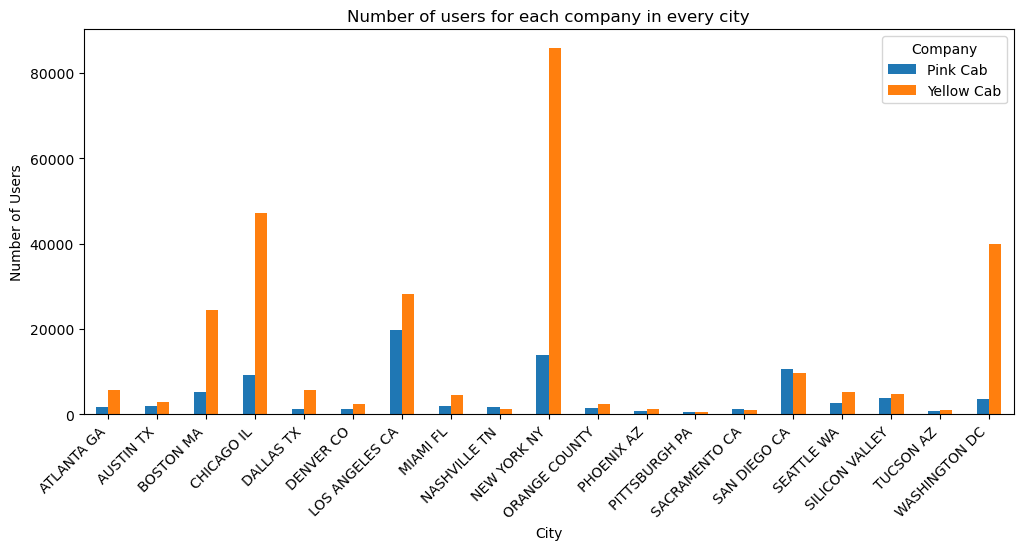

In [49]:
users_per_city = customers.groupby(['COMPANY', 'CITY'])['CUSTOMER_ID'].count().reset_index()
users_per_city.pivot(index='CITY', columns='COMPANY',values='CUSTOMER_ID').plot(kind='bar', stacked=False, figsize=(12,5))

plt.xlabel('City')
plt.ylabel('Number of Users')
plt.title('Number of users for each company in every city')
plt.legend(title='Company')
plt.xticks(rotation=45, ha='right')
plt.show()

<pre>From the above bar plot, it can be noticed that Yellow cabs capture the market by more number of users especially in the metropolitans.</pre>

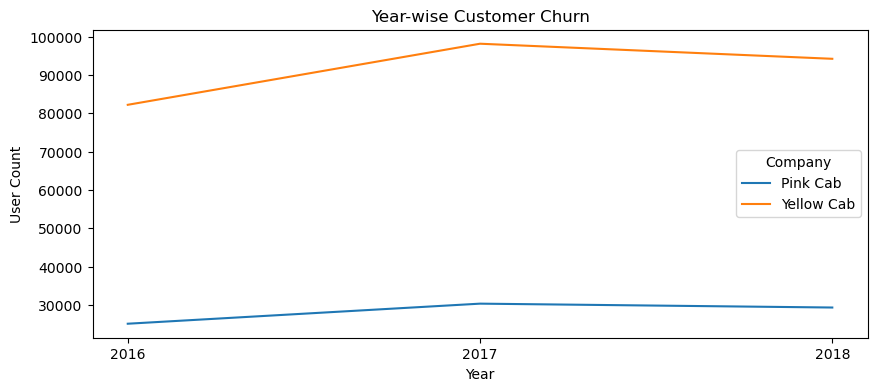

In [50]:
user_churn = customers.groupby(['COMPANY', pd.to_datetime(customers.DATE_OF_TRAVEL).dt.year])['CUSTOMER_ID'].count().reset_index()
user_churn.pivot(index='DATE_OF_TRAVEL', columns='COMPANY', values='CUSTOMER_ID').plot(kind='line', figsize=(10,4))

plt.xlabel('Year')
plt.ylabel('User Count')
plt.title('Year-wise Customer Churn')
plt.legend(title='Company')
plt.xticks([2016, 2017, 2018])
plt.show()

<pre>The customer segment of both the companies are quite different with Yellow cabs having almost 3 times more number of customers. The higher market capture of Yellow cabs suggest it is worth investing into.</pre>

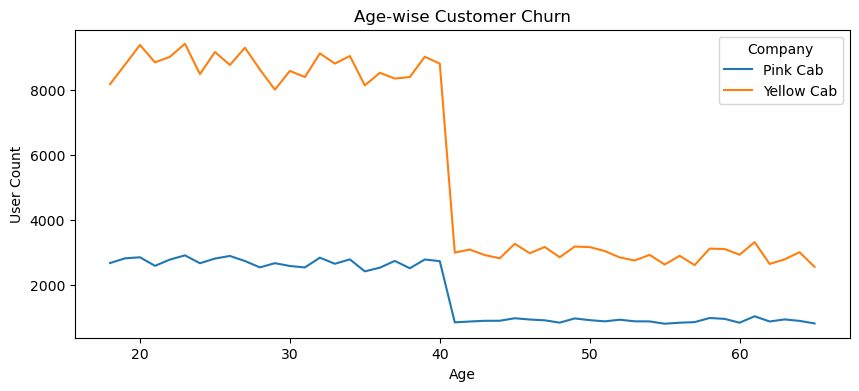

In [51]:
user_age = customers.groupby(['COMPANY', 'AGE'])['CUSTOMER_ID'].count().reset_index()
user_age.pivot(index='AGE', columns='COMPANY', values='CUSTOMER_ID').plot(kind='line', figsize=(10,4))

plt.xlabel('Age')
plt.ylabel('User Count')
plt.title('Age-wise Customer Churn')
plt.legend(title='Company')
plt.show()

<pre>From the above line chart we can notice that both the companies have similar age group range travelling but there is downfall of number of customers after age 40. Yellow cabs have more diversity in the age groups as seen by various fluctions in the age groups from 18 to 40.</pre>

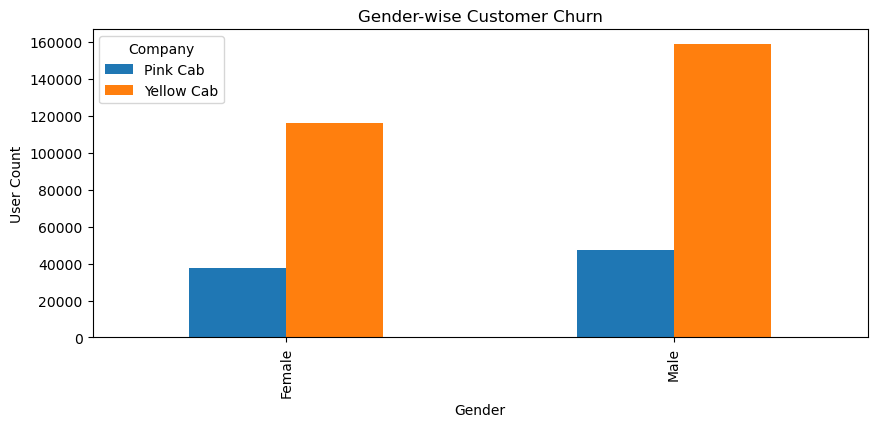

In [52]:
user_gender = customers.groupby(['COMPANY', 'GENDER'])['CUSTOMER_ID'].count().reset_index()
user_gender.pivot(index='GENDER', columns='COMPANY', values='CUSTOMER_ID').plot(kind='bar', figsize=(10,4))

plt.xlabel('Gender')
plt.ylabel('User Count')
plt.title('Gender-wise Customer Churn')
plt.legend(title='Company')
plt.show()

<pre>Male cab riders are significantly more compared to Female riders in the case of Yellow cabs but not in case of Pink cab. For pink cabs we can notice the count is pretty much similar.</pre>

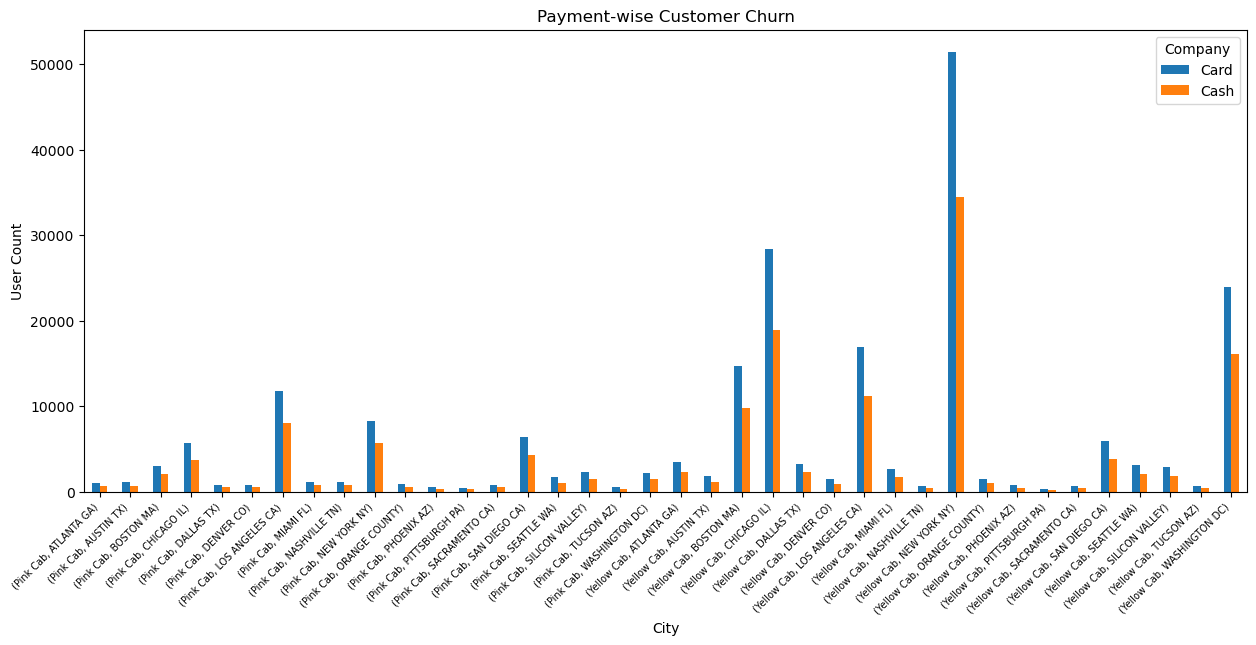

In [53]:
user_payment = customers.groupby(['COMPANY', 'CITY', 'PAYMENT_MODE'])['CUSTOMER_ID'].count().reset_index()
user_payment.pivot(index=['COMPANY','CITY'], columns='PAYMENT_MODE', values='CUSTOMER_ID').plot(kind='bar', figsize=(15,6))

plt.xlabel('City')
plt.ylabel('User Count')
plt.title('Payment-wise Customer Churn')
plt.legend(title='Company')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.show()

<pre>As we analyze the Payment-wise Customer churn plot, we notice that there are more number of card payments for both Pink and Yellow cab customers in all cities.</pre>

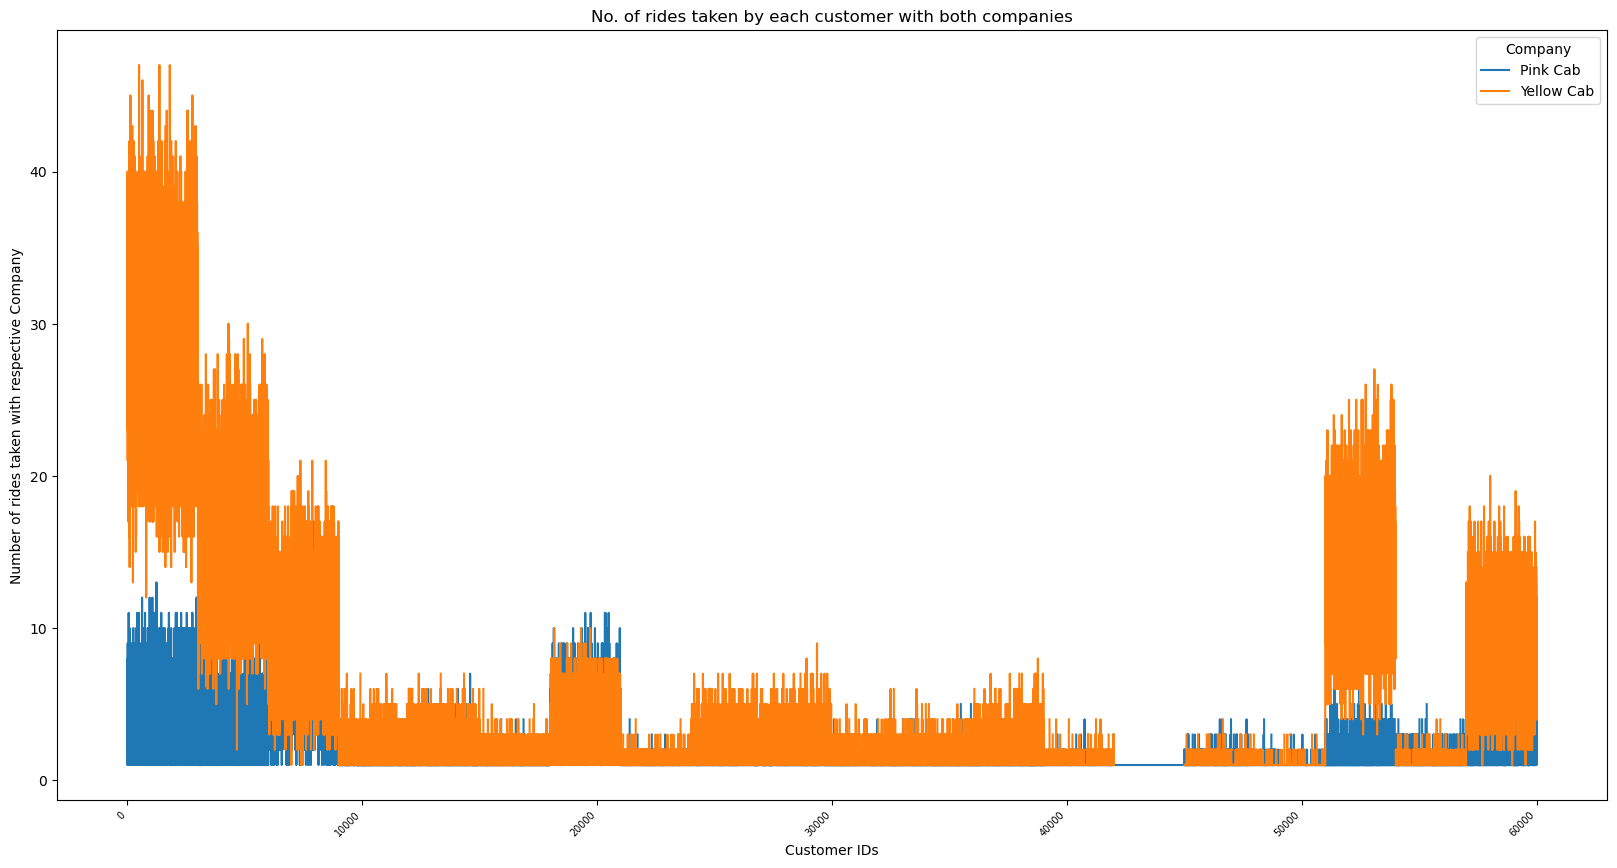

In [54]:
user_payment = customers.groupby(['COMPANY', 'CUSTOMER_ID'])['TRANSACTION_ID'].count().reset_index()
user_payment.pivot(index='CUSTOMER_ID', columns='COMPANY', values='TRANSACTION_ID').plot(kind='line', stacked=False, figsize=(20,10))

plt.xlabel('Customer IDs')
plt.ylabel('Number of rides taken with respective Company')
plt.title('No. of rides taken by each customer with both companies')
plt.legend(title='Company')
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.show()

<pre>From above line plot we can notice that customers are using both Yellow and Pink cabs and are preferring to use Yellow cabs more for most of the times.</pre>

In [58]:
customers.INCOME.describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: INCOME, dtype: float64

<Axes: xlabel='INCOME', ylabel='Count'>

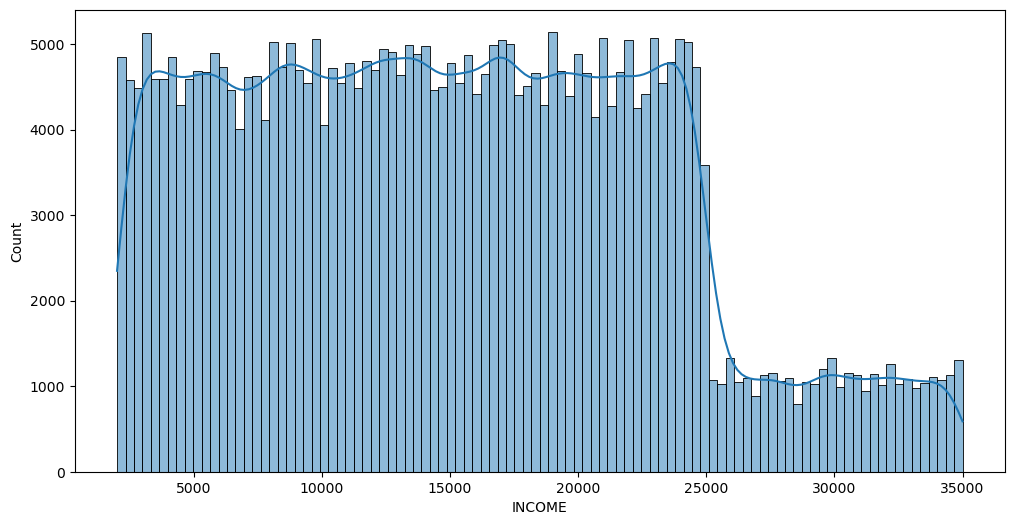

In [64]:
sns.histplot(customers.INCOME, kde=True, bins=100)

In [79]:
customers["INCOME_CLASS"] = customers["INCOME"].apply(lambda x:'Lower (<10000)' if x<10000 else 'Middle (>=10000 and <=20000)' if 10000<=x<=20000 else 'Higher (>20000)')

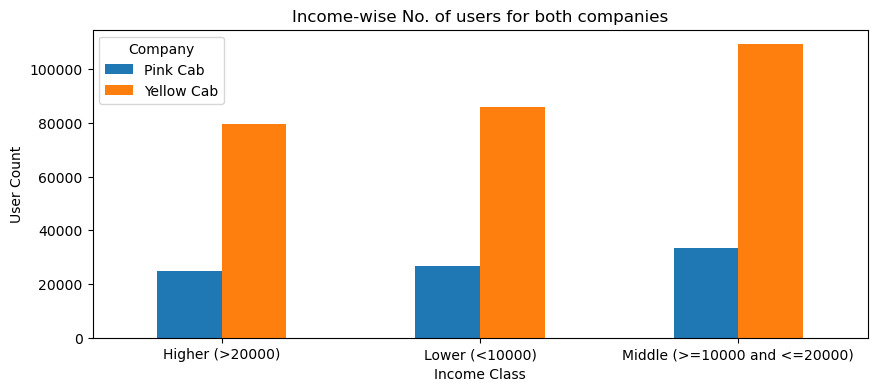

In [84]:
user_income = customers.groupby(['COMPANY', 'INCOME_CLASS'])['CUSTOMER_ID'].count().reset_index()
user_income.pivot(index='INCOME_CLASS', columns='COMPANY', values='CUSTOMER_ID').plot(kind='bar', stacked=False, figsize=(10, 4))

plt.xlabel('Income Class')
plt.ylabel('User Count')
plt.title('Income-wise No. of users for both companies')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Company')
plt.show()

<pre>The above bar plot shows that in Pink cabs the number of customers are pretty similar from all income classes. However in case of Yellow cabs the number of middle class customers are quite high which again shows that Yellow cabs are more potential investment option to make profits in future.</pre>

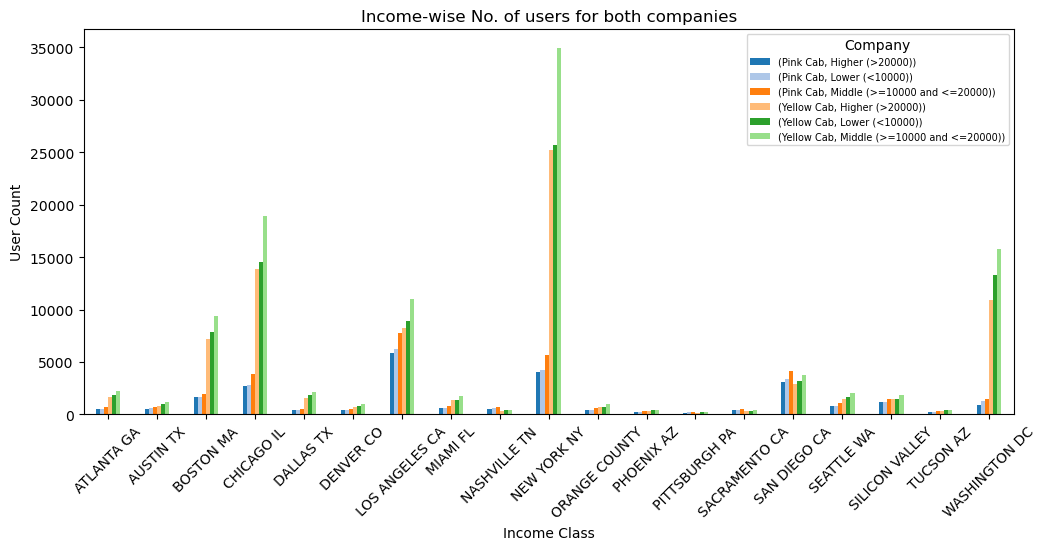

In [109]:
user_income = customers.groupby(['COMPANY', 'CITY', 'INCOME_CLASS'])['CUSTOMER_ID'].count().reset_index()
user_income.pivot(index='CITY', columns=['COMPANY', 'INCOME_CLASS'], values='CUSTOMER_ID').plot(kind='bar', stacked=False, figsize=(12, 5), color=colors)

plt.xlabel('Income Class')
plt.ylabel('User Count')
plt.title('Income-wise No. of users for both companies')
plt.xticks(rotation=45, ha='center')
plt.legend(title='Company', fontsize=7)
plt.show()

<pre>As we can notice in the above chart the Yellow cabs have more number of users as well as highest number of middle class customers which signifies Yellow cabs to be the better option.</pre>

#### End, Thank you.